<a href="https://colab.research.google.com/github/Shambhurajdesai/Capstone-3---Cardio-Vascular-Risk--Classification/blob/main/Cardio_Vascular_Risk_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

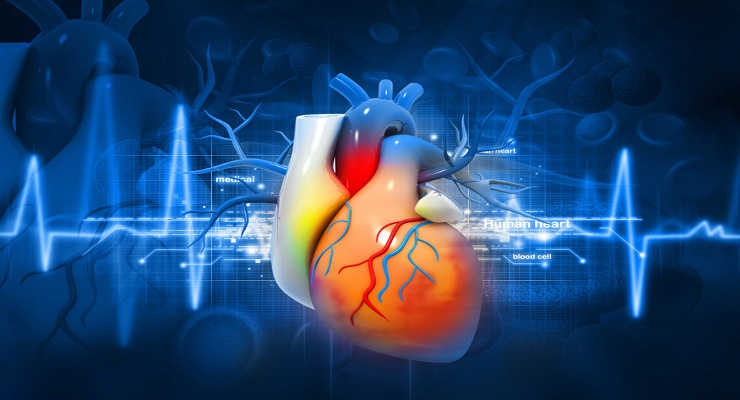

#Project Title: <font color='yellow'>**Cardio Vascular Risk Prediction**

###<font color='red'>Problem Description
###The dataset is from an ougoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether a patient has 10 year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is potential risk factor. There are both demographic and behavioural and medical risk factor.

###**Data Description**
**Data_Cardio_Vascular_Risk** - Various factors affecting the health

**Data Fields**

The Following description is given about the dataset



*  Sex - Gender
*  Age - Age


*   is_smoking - whether smoking currently or not
*   Cigs_per_day - Cigarettes smoked per day


*   BP_Meds - Whether taking BP meds or not
*   Prevalent stroke - If the patient has a history of stroke


*   Prevalent hyp - If the patient has a history of hypertension
*   Diabetes - Patient has diabetes or not



*   Tot Chol - Cholesterol measure
*   Sys BP - BP measure


*   Dia BP - BP measure
*   BMI - Body Mass Index


*   Heart Rate - Heart Rate measure










###<font color='green'>Health statement -

In today's day to day life a human being is surrounded by different types of risk, the risk is individually a part of our habits and addictions. Addictions like smoking, alcohol, unhealthy food etc. 
These some factors are affects on heart and its health. 

This project has real world health problem and by using some statistics and Machine Learning algorithms we try to fit a model to predict the Coronary Heart Disease (CHD).

In [1]:
#importing the liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from math import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore')

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
# import smote_variants as sv 

from collections import Counter

In [2]:
#connecting the google drive to the colab for data importing
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/data_cardiovascular_risk.csv')

In [4]:
#top 5 rows of the data set
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#bottom 5 rows of the data set
df.tail(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#shape of a data set
df.shape

(3390, 17)

In [7]:
#size of a data set
df.size

57630

In [8]:
#description of a data set
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#there are no duplicates in the data set
len(df[df.duplicated()])

0

In [10]:
#we dropping the 'id' columns, because no use of it
df.drop('id',axis=1,inplace=True)

### **Data** **Cleaning**